In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets, ensemble
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report

In [2]:
cancer = datasets.load_breast_cancer()
X, y = cancer.data, cancer.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=13)

params = {'n_estimators': 1000,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01}

In [4]:
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

acc = accuracy_score(y_test, clf.predict(X_test))
print("The accuracy score on test set: {:.4f}".format(acc))

The accuracy score on test set: 0.9123


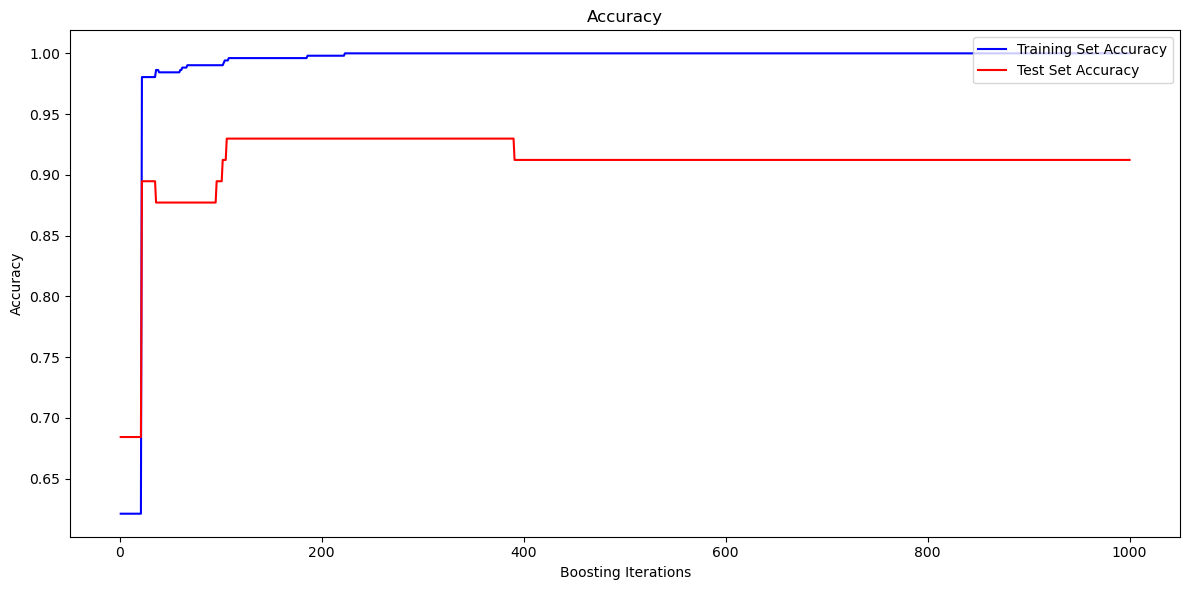

In [5]:
train_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(clf.staged_predict(X_train)):
    train_score[i] = accuracy_score(y_train, y_pred)

test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = accuracy_score(y_test, y_pred)
    
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 1, 1)
plt.title('Accuracy') # Binomial deviance loss function for binary classification
plt.plot(np.arange(params['n_estimators']) + 1, train_score, 'b-', label='Training Set Accuracy')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-', label='Test Set Accuracy')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Accuracy')
fig.tight_layout()
plt.show()

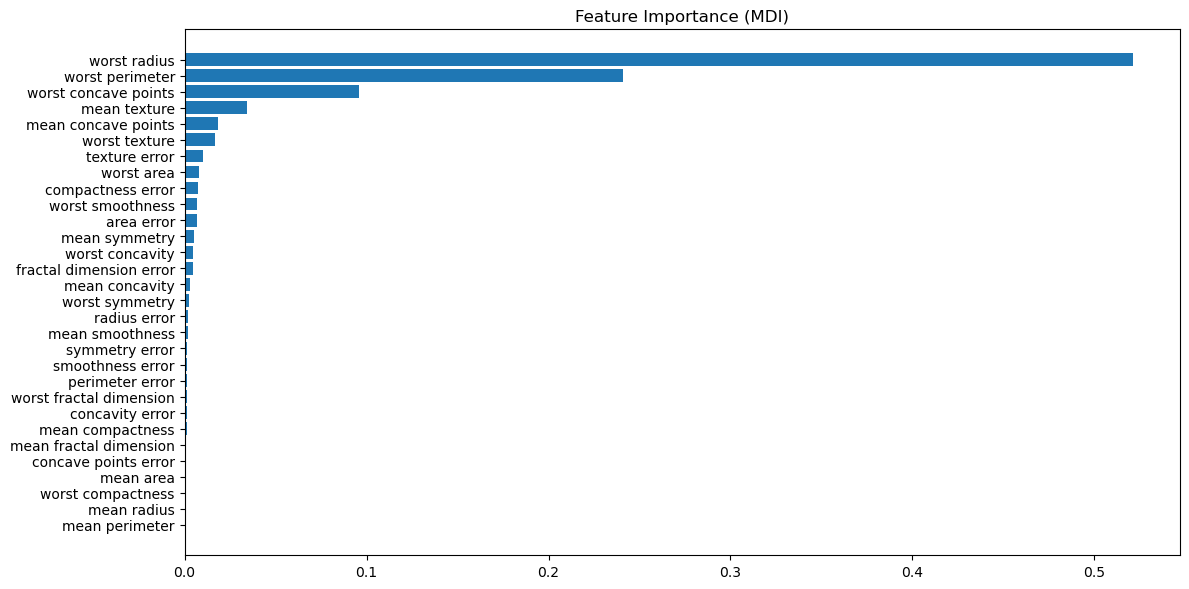

In [6]:
feature_importance = clf.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

fig = plt.figure(figsize=(12, 6))

plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(cancer.feature_names)[sorted_idx])
plt.title('Feature Importance (MDI)')

fig.tight_layout()
plt.show()

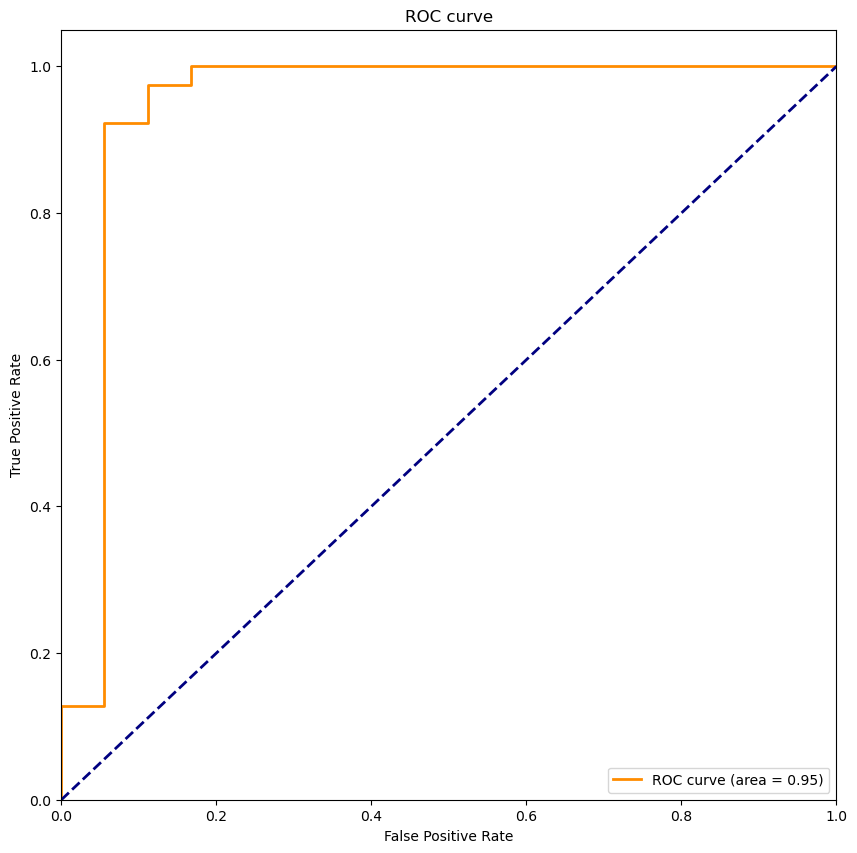

In [7]:
fpr, tpr, _ = roc_curve(y_true=y_test, y_score=clf.predict_proba(X_test)[:,1]) # real y & predicted y (based on "Sepal width")
roc_auc = auc(fpr, tpr) # AUC 면적의 값 (수치)

plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title("ROC curve")
plt.show()

In [9]:
predictions = clf.predict(X_test)
print(classification_report(y_test, predictions)) # Precision, Recall, F1-score 등을 확인할 수 있습니다.

print("Accuracy on Training set: {:.3f}".format(clf.score(X_train, y_train)))
print("Accuracy on Test set: {:.3f}".format(clf.score(X_test, y_test)))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86        18
           1       0.95      0.92      0.94        39

    accuracy                           0.91        57
   macro avg       0.89      0.91      0.90        57
weighted avg       0.91      0.91      0.91        57

Accuracy on Training set: 1.000
Accuracy on Test set: 0.912
